In [1]:
import logging
import sys
import numpy as np 
import pandas as pd
from pandas import to_datetime
import os
import glob
import matplotlib.pyplot as plt
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logger = logging.getLogger('LOGGER_NAME')
logger.info('Start CambiumAnomalyClassificator')

INFO:LOGGER_NAME:Start CambiumAnomalyClassificator


# Load data from Cambium CPEs reports in a single file

In [2]:

def get_concat_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], axis=0).reset_index()

path = './dataset cambium/'

fmask = os.path.join(path, '*.csv')
print(fmask)
list_of_files=glob.glob(fmask)
print(list_of_files)
Data_Cambium = get_concat_csv(glob.glob(fmask),sep = ',', encoding='utf-8')

print(Data_Cambium.shape)
print(Data_Cambium.info())
print(Data_Cambium)

logger.info("Saving a single Dataset")
Data_Cambium.to_csv('./Single_Dataset_Cambium.csv', encoding='utf-8')


./dataset cambium/*.csv
['./dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201225T000000-21d21a70-4644-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201226T000000-4c239780-470d-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201227T000000-76cfb7b0-47d6-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201228T000000-a11e2780-489f-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201229T000000-cb83efe0-4968-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201230T000000-f5f57810-4a31-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-syst

# Loading dataset 

Features are: Polling Timestamp,MAC,Device Name, Device Type, Device Mode, Downlink MCS, Uplink MCS, Downlink ThroughPut (Kbps), Uplink ThroughPut (Kbps), Downlink Retransmission Pkts (%),
Uplink Retransmission Pkts (%), CPUs, Session Drops, Downlink SNR (dB), Uplink SNR (dB),
Downlink Usage (Packets), Uplink Usage (Packets), Downlink RSSI (dBm), Uplink RSSI (dBm),
Offline Count, Status, Status Duration.

In [3]:
data = './Single_Dataset_Cambium.csv'
colX = ['Polling Timestamp', 'MAC', 'Device Name', 'Device Type', 'Device Mode',
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'Status Duration']

X_data_cambium = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
print(X_data_cambium.info())
print(X_data_cambium.shape)
print(X_data_cambium)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60573 entries, 0 to 60572
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 60573 non-null  object 
 1   MAC                               60573 non-null  object 
 2   Device Name                       60573 non-null  object 
 3   Device Type                       60573 non-null  object 
 4   Device Mode                       60573 non-null  object 
 5   Downlink MCS                      60573 non-null  object 
 6   Uplink MCS                        60573 non-null  object 
 7   Downlink ThroughPut (Kbps)        60573 non-null  float64
 8   Uplink ThroughPut (Kbps)          60573 non-null  float64
 9   Downlink Retransmission Pkts (%)  60573 non-null  float64
 10  Uplink Retransmission Pkts (%)    60573 non-null  float64
 11  CPUs                              60573 non-null  float64
 12  Sess

# Selecting records with "Device Mode" = "SM".

In [4]:
print ('Dataset before dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Device Mode'].value_counts())
X_data_cambium = X_data_cambium.drop(X_data_cambium.loc[(X_data_cambium['Device Mode'] != 'SM')].index)
print ('Dataset after dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Device Mode'].value_counts())

Dataset before dropping records:
 (60573, 22)
SM    57302
AP     3271
Name: Device Mode, dtype: int64
Dataset after dropping records:
 (57302, 22)
SM    57302
Name: Device Mode, dtype: int64


In [5]:
# Status Duration: calculating amount of minutes

print(X_data_cambium.info())

MStatusDuration = []
for row in X_data_cambium['Status Duration']:
    #print(row)
    temp = (str(row)).split()
    #print(temp)
    d = ((temp[0].split('d'))[0])
    h = (temp[1].split('h'))[0]
    m = (temp[2].split('m'))[0]
    #print(int(d)*24*60+int(h)*60+int(m))
    MStatusDuration.append(int(d)*24*60+int(h)*60+int(m))
X_data_cambium['MStatus Duration'] = MStatusDuration
# elimina caratteristica origine
X_data_cambium.drop(columns=['Status Duration'],inplace=True)
print (X_data_cambium)

print(X_data_cambium.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57302 entries, 0 to 60572
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 57302 non-null  object 
 1   MAC                               57302 non-null  object 
 2   Device Name                       57302 non-null  object 
 3   Device Type                       57302 non-null  object 
 4   Device Mode                       57302 non-null  object 
 5   Downlink MCS                      57302 non-null  object 
 6   Uplink MCS                        57302 non-null  object 
 7   Downlink ThroughPut (Kbps)        57302 non-null  float64
 8   Uplink ThroughPut (Kbps)          57302 non-null  float64
 9   Downlink Retransmission Pkts (%)  57302 non-null  float64
 10  Uplink Retransmission Pkts (%)    57302 non-null  float64
 11  CPUs                              57302 non-null  float64
 12  Sess

# Selecting records where "Status" = "Online" or  ("Status" = "Offline" and MStatus Duration < 10gg)

In [6]:
print ('Dataset before dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Status'].value_counts())
X_data_cambium = X_data_cambium.drop(X_data_cambium.loc[(X_data_cambium['Status'] == 'Offline') & (X_data_cambium['MStatus Duration'] > 14400)].index)
print ('Dataset after dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Status'].value_counts())


Dataset before dropping records:
 (57302, 22)
Online     40418
Offline    16884
Name: Status, dtype: int64
Dataset after dropping records:
 (41977, 22)
Online     40418
Offline     1559
Name: Status, dtype: int64


# Saving Dataset 

In [7]:
logger.info("Saving Dataset")
X_data_cambium.to_csv('./X_Data_Cambium.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset


In [8]:
logger.info("Printing NaN values:")
print(X_data_cambium.isnull().sum().sum())
if (X_data_cambium.isnull().sum().sum()>0):    
    print(X_data_cambium.isnull().sum())

INFO:LOGGER_NAME:Printing NaN values:
0


# Load file with support requests

In [9]:
data = './ticket/ticket_split.csv'
colX = ['Cliente','DataTime']
X_data_ticket = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_ticket.info())
print(X_data_ticket.shape)
print(X_data_ticket)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cliente   1705 non-null   object
 1   DataTime  1705 non-null   object
dtypes: object(2)
memory usage: 26.8+ KB
None
(1705, 2)
               Cliente                   DataTime
0        ABBATE ANGELO  2020-09-14 11:49:02+02:00
1        ABBATE ANGELO  2020-11-27 10:47:23+01:00
2      ABBATE PASQUALE  2020-11-10 15:30:36+01:00
3        ADZOVIC FEHIM  2020-07-10 09:07:44+02:00
4        ADZOVIC FEHIM  2020-08-03 09:48:26+02:00
...                ...                        ...
1700      ZARA NEMESIO  2019-06-17 09:16:17+02:00
1701      ZARA NEMESIO  2020-09-25 10:14:45+02:00
1702      ZARA NEMESIO  2020-12-01 09:43:54+01:00
1703      ZARA NEMESIO  2021-03-01 09:27:56+01:00
1704        ZINI MARIA  2020-11-23 11:41:11+01:00

[1705 rows x 2 columns]


In [10]:
print('Printing Polling Timestamp Min,Max Data Cambium:',X_data_cambium['Polling Timestamp'].values.min(),X_data_cambium['Polling Timestamp'].values.max())
print('Printing DataTime Min,Max Data Ticket:',X_data_ticket['DataTime'].values.min(),X_data_ticket['DataTime'].values.max())

Printing Polling Timestamp Min,Max Data Cambium: 2020-12-24 01:00:00 2021-03-22 01:00:00
Printing DataTime Min,Max Data Ticket: 2019-02-19 11:30:26+01:00 2021-03-23 09:12:09+01:00


In [11]:
print(X_data_ticket ['Cliente'].value_counts())
X_data_ticket ['Cliente'] = X_data_ticket ['Cliente'].str.strip()
X_data_ticket ['Cliente'] = X_data_ticket ['Cliente'].str.upper()
print(X_data_ticket ['Cliente'].value_counts())

logger.info("Get only Data from X_data_ticket")
X_data_ticket['DataTime'] = to_datetime(X_data_ticket['DataTime'],dayfirst = True, utc=True)
X_data_ticket['DataTime'] = X_data_ticket['DataTime'].dt.date
X_data_ticket.sort_values(by=['DataTime'], ascending = 1, inplace = True)
print(X_data_ticket)

print(X_data_cambium ['Device Name'].value_counts())
X_data_cambium ['Device Name'] = X_data_cambium ['Device Name'].str.strip()
X_data_cambium ['Device Name'] = X_data_cambium ['Device Name'].str.upper()
print(X_data_cambium ['Device Name'].value_counts())

logger.info("Get only Data from X_data_cambium")
X_data_cambium['Polling Timestamp'] = to_datetime(X_data_cambium['Polling Timestamp'],dayfirst = True, utc=True)
X_data_cambium['Polling Timestamp'] = X_data_cambium['Polling Timestamp'].dt.date
X_data_cambium.sort_values(by=['Polling Timestamp'], ascending = 1, inplace = True)
print(X_data_cambium)

 ESPOSITO GENNARO                              14
 D'ANGIOLELLA PATRIZIO NOTAIO STUDIO AVERSA    14
 CROCIANI MARIA                                12
 GIOVISI SRL                                   11
 GRAZIANO & CO. SRL                            10
                                               ..
 OKORO KATE                                     1
 IANNIELLO FABIO                                1
 ESPOSITO CARMELA                               1
 AIHENMWINKIEKIE OSAGIODUMA J.                  1
 ALEXANDRU ANDREEA NICOLETA                     1
Name: Cliente, Length: 700, dtype: int64
ESPOSITO GENNARO                              14
D'ANGIOLELLA PATRIZIO NOTAIO STUDIO AVERSA    14
CROCIANI MARIA                                12
GIOVISI SRL                                   11
GRAZIANO & CO. SRL                            10
                                              ..
PISCITELLI ANTONIO                             1
CERULLO MARCO                                  1
PICCOLO CARLA    

# Dropping records where X_data_ticket DataTime < minimum of Polling Timestamp

In [12]:
X_data_ticket = X_data_ticket[X_data_ticket['DataTime'] >= pd.to_datetime(X_data_cambium['Polling Timestamp'].values.min(),dayfirst = True, utc=True)]
print(X_data_ticket.shape)
logger.info("Saving Dataset... Ticket")
X_data_ticket.to_csv('./X_data_ticket.csv', encoding='utf-8')

(511, 2)
INFO:LOGGER_NAME:Saving Dataset... Ticket


# Merging CPEs status and issues datasets

In [13]:
print("Dataset X_data_cambium:",X_data_cambium.shape)
print("Dataset X_data_ticket:",X_data_ticket.shape)
XY_data = pd.merge(X_data_cambium,X_data_ticket,left_on=['Device Name','Polling Timestamp'],right_on=['Cliente','DataTime'],how='left')
print ("Dataset XY_data:", XY_data.shape)

Dataset X_data_cambium: (41977, 22)
Dataset X_data_ticket: (511, 2)
Dataset XY_data: (41977, 24)


In [14]:
print ("Dataset XY_data:", XY_data.info())
print ("Dataset XY_data:", XY_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41977 entries, 0 to 41976
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Sess

In [15]:
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

# Load file with closed requests

In [16]:
data = './ticket/ticket chiusi split.csv'
colX = ['Cliente Ticket Chiuso','DataTime Ticket Chiuso']
X_data_ticket_closed = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_ticket_closed.info())
print(X_data_ticket_closed.shape)
print(X_data_ticket_closed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cliente Ticket Chiuso   427 non-null    object
 1   DataTime Ticket Chiuso  427 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB
None
(427, 2)
    Cliente Ticket Chiuso     DataTime Ticket Chiuso
0           ADZOVIC FEHIM  2021-03-24 11:52:37+01:00
1           ADZOVIC FEHIM  2021-01-29 12:53:54+01:00
2           ADZOVIC FEHIM  2021-03-23 12:33:48+01:00
3            AGOSTI MARIO  2021-01-20 09:43:35+01:00
4             ALETOR JOAN  2021-01-12 09:42:33+01:00
..                    ...                        ...
422   VILLA DEI CEDRI SRL  2021-02-11 16:43:24+01:00
423        XHELAJ BLERINA  2021-01-18 15:08:24+01:00
424      ZAGARIA RAFFAELE  2021-03-17 09:45:01+01:00
425        ZAMPELLA LUIGI  2021-03-03 09:35:12+01:00
426          ZARA NEMESIO  2021-03-01 11:59:44+01:0

In [17]:
print(X_data_ticket_closed ['Cliente Ticket Chiuso'].value_counts())
X_data_ticket_closed ['Cliente Ticket Chiuso'] = X_data_ticket_closed ['Cliente Ticket Chiuso'].str.strip()
X_data_ticket_closed ['Cliente Ticket Chiuso'] = X_data_ticket_closed ['Cliente Ticket Chiuso'].str.upper()
print(X_data_ticket_closed ['Cliente Ticket Chiuso'].value_counts())

logger.info("Get only Data from X_data_ticket_closed")
X_data_ticket_closed['DataTime Ticket Chiuso'] = to_datetime(X_data_ticket_closed['DataTime Ticket Chiuso'],dayfirst = True, utc=True)
X_data_ticket_closed['DataTime Ticket Chiuso'] = X_data_ticket_closed['DataTime Ticket Chiuso'].dt.date
X_data_ticket_closed.sort_values(by=['DataTime Ticket Chiuso'], ascending = 1, inplace = True)
print(X_data_ticket_closed.info())

ESPOSITO GENNARO           5
RAN SRL                    5
TROTTA DOMENICO            5
FERRANTE ANTONIETTA        4
MASSA GIOVANNI UTENZA 2    4
                          ..
COSTINEL CONSTANTIN        1
SONTINO UGO                1
PEDANA TAMMARO             1
DE FALCO SILVIA            1
LUCIGNANO GENNARO          1
Name: Cliente Ticket Chiuso, Length: 293, dtype: int64
TROTTA DOMENICO                            5
ESPOSITO GENNARO                           5
RAN SRL                                    5
BIONDI CIRO                                4
FERRANTE ANTONIETTA                        4
                                          ..
KUSHNIR OLGA                               1
PEDATA GRAZIA                              1
SONTINO UGO                                1
PEDANA TAMMARO                             1
DRIVEIN GARDEN MOVIE SAS DI PALUMBO E&C    1
Name: Cliente Ticket Chiuso, Length: 291, dtype: int64
INFO:LOGGER_NAME:Get only Data from X_data_ticket_closed
<class 'pandas.core

In [18]:
print('Printing Polling Timestamp Min,Max Data Cambium:',X_data_cambium['Polling Timestamp'].values.min(),X_data_cambium['Polling Timestamp'].values.max())
print('Printing DataTime Min,Max Ticket Chiuso:',X_data_ticket_closed['DataTime Ticket Chiuso'].values.min(),X_data_ticket_closed['DataTime Ticket Chiuso'].values.max())

Printing Polling Timestamp Min,Max Data Cambium: 2020-12-24 2021-03-22
Printing DataTime Min,Max Ticket Chiuso: 2020-12-24 2021-03-24


# Dropping records where X_data_ticket_closed DataTime < minimum of Polling Timestamp

In [19]:
X_data_ticket_closed = X_data_ticket_closed[X_data_ticket_closed['DataTime Ticket Chiuso'] >= pd.to_datetime(X_data_cambium['Polling Timestamp'].values.min(),dayfirst = True, utc=True)]
print(X_data_ticket_closed.shape)
logger.info("Saving Dataset... Ticket")
X_data_ticket_closed.to_csv('./X_data_ticket_closed.csv', encoding='utf-8')

(427, 2)
INFO:LOGGER_NAME:Saving Dataset... Ticket


# Merging CPEs status and issues datasets

In [20]:
print("Dataset XY_data:",XY_data.shape)
print("Dataset X_data_ticket_closed:",X_data_ticket_closed.shape)
XY_data = pd.merge(XY_data,X_data_ticket_closed,left_on=['Device Name','Polling Timestamp'],right_on=['Cliente Ticket Chiuso','DataTime Ticket Chiuso'],how='left')
print ("Dataset XY_data:", XY_data.shape)
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

Dataset XY_data: (41977, 24)
Dataset X_data_ticket_closed: (427, 2)
Dataset XY_data: (41977, 26)


# Adding "Ticket" label   

In [21]:
XY_data['Ticket'] = np.NaN
print(XY_data.shape)

print('Records with no Ticket:',XY_data['DataTime'].isnull().sum())
print('Records with Ticket:',XY_data['DataTime'].notnull().sum())

XY_data.loc[XY_data['DataTime'].isnull(),['Ticket']]  = '0'
XY_data.loc[XY_data['DataTime'].notnull(),['Ticket']] = '1'

print(XY_data.groupby('Ticket').size())

(41977, 27)
Records with no Ticket: 41758
Records with Ticket: 219
Ticket
0    41758
1      219
dtype: int64


In [22]:
'''
# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket
import time

XY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])
print(XY_data.info())

#XY_data.set_index(['Device Name'], drop = False)

XY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])
ind = XY_data_1.index
number_of_rows = len(ind)

i = 0
for index1,row1 in XY_data_1.iterrows():
    print('Device Name: ', str(index1)+'_'+str(time.time()))
    print(i , str('di ')+str(number_of_rows))
    for index, row in XY_data.iterrows():
        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                
                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))
                   & (pd.notna(row['DataTime Ticket Chiuso']))):
                    #print('break')
                    #print(row['DataTime Ticket Chiuso'])
                    #print('break', time.time())
                    break            
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) & (pd.isna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print(index)
                    #print('index', time.time())
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) 
                     & (pd.notna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print('break1')
                    #print('break1', time.time())
                    break
    i = i+1
'''

"\n# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket\nimport time\n\nXY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])\nprint(XY_data.info())\n\n#XY_data.set_index(['Device Name'], drop = False)\n\nXY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])\nind = XY_data_1.index\nnumber_of_rows = len(ind)\n\ni = 0\nfor index1,row1 in XY_data_1.iterrows():\n    print('Device Name: ', str(index1)+'_'+str(time.time()))\n    print(i , str('di ')+str(number_of_rows))\n    for index, row in XY_data.iterrows():\n        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                \n                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))\n                   & (pd.notna(row['DataTime Ticket Chiuso']))):\n                    #print('break')\n                    #pr

In [23]:
# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket
import time

XY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])
print(XY_data.info())

XY_data.set_index(['Device Name'], drop = False)

XY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])
ind = XY_data_1.index
number_of_rows = len(ind)
i = 1

for index1,row1 in XY_data_1.iterrows():
    XY_data_temp = XY_data[XY_data['Device Name']==XY_data_1.loc[index1]['Device Name']]
    print(str(i), str('di ')+str(number_of_rows)+' Device Name: ', str(XY_data_1.loc[index1]['Device Name'])+'_'+str(time.time()))
    for index, row in XY_data_temp.iterrows():
        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                
                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))
                   & (pd.notna(row['DataTime Ticket Chiuso']))):
                    #print('break')
                    #print(row['DataTime Ticket Chiuso'])
                    #print('break', time.time())
                    break            
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) & (pd.isna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print(index)
                    #print('index', time.time())
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) 
                     & (pd.notna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print('break1')
                    #print('break1', time.time())
                    break
    i = i+1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41977 entries, 117 to 41850
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Se

In [24]:
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

# Load Customer file

In [25]:
data = './clienti/clienti_(1).csv'
colX = ['COD. CLIENTE','NOME CLIENTE','CLIENTE ATTIVO','COMUNE INSTALLAZIONE','DIFFUSIONE']

X_data_cliente = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_cliente.info())
print(X_data_cliente.shape)
print(X_data_cliente)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          2067 non-null   object
 1   NOME CLIENTE          2067 non-null   object
 2   CLIENTE ATTIVO        2067 non-null   object
 3   COMUNE INSTALLAZIONE  2067 non-null   object
 4   DIFFUSIONE            1731 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB
None
(2067, 5)
     COD. CLIENTE                       NOME CLIENTE CLIENTE ATTIVO  \
0            Fly1                    CSA s.c.a. r.l.             NO   
1            Fly2  STUDIO COMMERCIALE PALMIERO LUIGI             NO   
2            Fly3                   ALCAS ITALIA SRL             NO   
3            Fly4                   STAR ENERGIA SRL             SI   
4            Fly5                    BRICO APPIA SRL             NO   
...           ...                                ...          

# Delete records where 'NOME CLIENTE' occurrence > 2

In [26]:
print(X_data_cliente.info())
X_data_cliente = X_data_cliente.groupby('NOME CLIENTE')   # group by
X_data_cliente = (X_data_cliente.filter(lambda x: len(x) < 2))  #  HAVING COUNT(*) < 2
print(X_data_cliente.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          2067 non-null   object
 1   NOME CLIENTE          2067 non-null   object
 2   CLIENTE ATTIVO        2067 non-null   object
 3   COMUNE INSTALLAZIONE  2067 non-null   object
 4   DIFFUSIONE            1731 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          1946 non-null   object
 1   NOME CLIENTE          1946 non-null   object
 2   CLIENTE ATTIVO        1946 non-null   object
 3   COMUNE INSTALLAZIONE  1946 non-null   object
 4   DIFFUSIONE            1624 non-null   object
dtypes: object(5)
memory usage: 91.2+ KB
N

# More datasets merging (XY_data with X_data_cliente) 

In [27]:
print("Dataset XY_data:",XY_data.shape)
print("Dataset X_data_cliente:",X_data_cliente.shape)

#print(X_data_cliente ['NOME CLIENTE'].value_counts())
X_data_cliente ['NOME CLIENTE'] = X_data_cliente ['NOME CLIENTE'].str.strip()
X_data_cliente ['NOME CLIENTE'] = X_data_cliente ['NOME CLIENTE'].str.upper()
#print(X_data_cliente ['NOME CLIENTE'].value_counts())

XY_data_ctc_all = pd.merge(XY_data,X_data_cliente,left_on=XY_data['Device Name'].str.upper(),right_on=X_data_cliente['NOME CLIENTE'].str.upper(),how='left')

print ("Dataset XY_data_ctc_all:", XY_data_ctc_all.shape)

Dataset XY_data: (41977, 27)
Dataset X_data_cliente: (1946, 5)
Dataset XY_data_ctc_all: (41977, 33)


# Save Dataset 

In [28]:
logger.info("Saving Dataset...XY_data_ctc_all")
XY_data_ctc_all.to_csv('./XY_data_ctc_all.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_all


# Load Dataset from previous saving 

Features are: Polling Timestamp,MAC,Device Name, Device Type, Device Mode, Downlink MCS, Uplink MCS, Downlink ThroughPut (Kbps), Uplink ThroughPut (Kbps), Downlink Retransmission Pkts (%),
Uplink Retransmission Pkts (%), CPUs, Session Drops, Downlink SNR (dB), Uplink SNR (dB),
Downlink Usage (Packets), Uplink Usage (Packets), Downlink RSSI (dBm), Uplink RSSI (dBm),
Offline Count, Status, Status Duration, COD. CLIENTE, COMUNE INSTALLAZIONE, DIFFUSIONE

In [29]:
data = './XY_data_ctc_all.csv'
colX = ['Polling Timestamp', 'MAC', 'Device Name', 'Device Type', 'Device Mode',
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE', 'CLIENTE ATTIVO', 'Ticket']
dtypes = {'COMUNE INSTALLAZIONE':'str' }

XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41977 entries, 0 to 41976
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Sess

# Saving Dataset 

In [30]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc_GVM.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


# Pre-elaborazione
## rimozione e imputazione dei valori mancanti
## gestione dati ordinali
## gestione dati nominali
## codifica delle etichette delle classi
## dataset di addestramento e dataset di test
## riduzione in scala e normalizzazione
## selezione delle caratteristiche appropriate 

# Gestione Valori Mancanti (GVM)

In [31]:
# Print the number of null (missing) values for each column
print(XY_data_ctc.isnull().sum())
# Print the occurrence of null values (true if data is missing)
print(XY_data_ctc.isnull())

Polling Timestamp                       0
MAC                                     0
Device Name                             0
Device Type                             0
Device Mode                             0
Downlink MCS                            0
Uplink MCS                              0
Downlink ThroughPut (Kbps)              0
Uplink ThroughPut (Kbps)                0
Downlink Retransmission Pkts (%)        0
Uplink Retransmission Pkts (%)          0
CPUs                                    0
Session Drops                           0
Downlink SNR (dB)                       0
Uplink SNR (dB)                         0
Downlink Usage (Packets)                0
Uplink Usage (Packets)                  0
Downlink RSSI (dBm)                     0
Uplink RSSI (dBm)                       0
Offline Count                           0
Status                                  0
MStatus Duration                        0
Ticket                                  0
COD. CLIENTE                      

In [32]:
# I check how many samples of the feature COD. CLIENTE are null
print('No. of samples with COD. CLIENTE not completed:',XY_data_ctc['COD. CLIENTE'].isnull().sum())
print((XY_data_ctc[XY_data_ctc['COD. CLIENTE'].isnull()]).groupby(['Device Name']).size())
# Drop only the lines where COD. CLIENTE is null
XY_data_ctc.dropna(subset=['COD. CLIENTE'],inplace=True)
print ('Dataset after deletion of samples with COD. CLIENTE not completed:\n', XY_data_ctc.shape)
print('No. of samples with COD. CLIENTE not completed:',XY_data_ctc['COD. CLIENTE'].isnull().sum())

No. of samples with COD. CLIENTE not completed: 10110
Device Name
ABBATE ANGELO                    89
ABBATE ANGELO LO. STAZZA         89
ABBATE PASQUALE - SOLO VOIP      89
AGAPE GHEORGHITAN STEFAN         89
AIRONE SERVICES SRL              89
                                 ..
TARTAGLIONE VINCENZO DEPOSITO    90
TRYBULSKI                        89
UBALDO NERO                      89
UCCIERO ANTONIO                  55
UCR SOC COOP                     89
Length: 129, dtype: int64
Dataset after deletion of samples with COD. CLIENTE not completed:
 (31867, 27)
No. of samples with COD. CLIENTE not completed: 0


# Drop records where customer is not active

In [33]:
print('No. of samples with CLIENTE ATTIVO not completed:',XY_data_ctc['CLIENTE ATTIVO'].isnull().sum())
print(XY_data_ctc.groupby('CLIENTE ATTIVO').size())

XY_data_ctc = XY_data_ctc[XY_data_ctc['CLIENTE ATTIVO'] == 'SI']
print(XY_data_ctc.groupby('CLIENTE ATTIVO').size())
print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print('No. of samples with CLIENTE ATTIVO not completed:',XY_data_ctc['CLIENTE ATTIVO'].isnull().sum())

No. of samples with CLIENTE ATTIVO not completed: 0
CLIENTE ATTIVO
NO      951
SI    30916
dtype: int64
CLIENTE ATTIVO
SI    30916
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30916 entries, 0 to 41976
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 30916 non-null  object 
 1   MAC                               30916 non-null  object 
 2   Device Name                       30916 non-null  object 
 3   Device Type                       30916 non-null  object 
 4   Device Mode                       30916 non-null  object 
 5   Downlink MCS                      30916 non-null  object 
 6   Uplink MCS                        30916 non-null  object 
 7   Downlink ThroughPut (Kbps)        30916 non-null  float64
 8   Uplink ThroughPut (Kbps)          30916 non-null  float64
 9   Downlink Retransmission Pkts (%)  30916 non-null 

In [34]:
# Dropping Polling Timestamp, Device Mode, CLIENTE ATTIVO

print('Dataset before dropping columns :',XY_data_ctc.shape)
XY_data_ctc.drop(columns=['Polling Timestamp', 'Device Mode', 'CLIENTE ATTIVO'],inplace=True)
print ('Dataset after dropping columns :', XY_data_ctc.shape)
print(XY_data_ctc.info())

Dataset before dropping columns : (30916, 27)
Dataset after dropping columns : (30916, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30916 entries, 0 to 41976
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MAC                               30916 non-null  object 
 1   Device Name                       30916 non-null  object 
 2   Device Type                       30916 non-null  object 
 3   Downlink MCS                      30916 non-null  object 
 4   Uplink MCS                        30916 non-null  object 
 5   Downlink ThroughPut (Kbps)        30916 non-null  float64
 6   Uplink ThroughPut (Kbps)          30916 non-null  float64
 7   Downlink Retransmission Pkts (%)  30916 non-null  float64
 8   Uplink Retransmission Pkts (%)    30916 non-null  float64
 9   CPUs                              30916 non-null  float64
 10  Session Drops                     30916

In [36]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


# Start here

In [2]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

#dtypes = {'COMUNE INSTALLAZIONE':'str' }
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

Ticket
0    30356
1      190
2      370
dtype: int64
Ticket
0    30356
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30916 entries, 0 to 30915
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            30916 non-null  int64  
 1   MAC                               30916 non-null  object 
 2   Device Name                       30916 non-null  object 
 3   Device Type                       30916 non-null  object 
 4   Downlink MCS                      30916 non-null  object 
 5   Uplink MCS                        30916 non-null  object 
 6   Downlink ThroughPut (Kbps)        30916 non-null  float64
 7   Uplink ThroughPut (Kbps)          30916 non-null  float64
 8   Downlink Retransmission Pkts (%)  30916 non-null  float64
 9   Uplink Retransmission Pkts (%)    30916 non-null  float64
 10  CPUs                              3

# Gestione di dati Categorici : Mappaggio di caratteristiche Ordinali
    Downlink MCS, Uplink MCS

In [3]:
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.strip()
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.upper()
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.strip()
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.upper()
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())
print(XY_data_ctc.shape)

size_mapping = {
        'DS 9': 35,
        'DS 8': 34,
        'DS 7': 33,
        'DS 6': 32,
        'DS 5': 31,
        'DS 4': 30,
        'DS 3': 29,
        'DS 2': 28,
        'DS 1': 27,
        'DS 0': 26,
        'SS 9': 25,
        'SS 8': 24,
        'SS 7': 23,
        'SS 6': 22,
        'SS 5': 21,
        'SS 4': 20,
        'SS 3': 19,
        'SS 2': 18,
        'SS 1': 17,
        'SS 0': 16,
        '15': 15,
        '14': 14,
        '13': 13,
        '12': 12,
        '11': 11,
        '10': 10,
        '9': 9,
        '8': 8,
        '7': 7,
        '6': 6,
        '5': 5,
        '4': 4,
        '3': 3,
        '2': 2,
        '1': 1,
        '0': 0}
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].map(size_mapping)
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].map(size_mapping)
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())

Unique values Downlink MCS:
 14      5356
12      4076
DS 8    4029
13      3723
11      2700
15      2195
10      1224
6       1080
DS 7     879
DS 9     739
4        704
5        644
9        635
3        475
0        447
DS 6     434
8        423
DS 5     238
2        200
DS 4     192
7        179
DS 3      85
DS 0      58
SS 8      47
SS 9      39
DS 2      36
1         30
DS 1      30
SS 7      11
SS 6       3
SS 4       3
SS 5       2
Name: Downlink MCS, dtype: int64
Unique values Uplink MCS
 8       7671
1       5937
9       1955
2       1625
DS 0    1302
12       989
7        950
11       918
3        815
DS 2     667
DS 1     660
DS 7     625
SS 9     618
10       581
DS 3     567
6        535
14       525
4        483
0        475
DS 6     467
DS 5     427
SS 8     386
13       332
5        295
DS 4     259
DS 8     169
SS 7     159
SS 6     151
SS 1     142
SS 4      98
SS 3      80
SS 5      28
SS 2      20
15         5
Name: Uplink MCS, dtype: int64
(30916, 24)
Unique valu

# Al momento Non vengono considerate
# Gestione di dati Categorici : Nominale
 Codifica delle Caratteristiche nominali (One-Hot) in valori interi. 
 MAC, Device Name, Device Type, Status, COD. CLIENTE, COMUNE INSTALLAZIONE, DIFFUSIONE


In [4]:
'''
print(XY_data_ctc.shape)
print ('Unique values MAC:\n', XY_data_ctc ['MAC'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['MAC'])
print(XY_data_ctc.shape)

print ('Unique values Device Name:\n', XY_data_ctc ['Device Name'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Name'])
print(XY_data_ctc.shape)

print ('Unique values Device Type:\n', XY_data_ctc['Device Type'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Type'])
print(XY_data_ctc.shape)
'''

print ('Unique values Status:\n', XY_data_ctc['Status'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Status'])
print(XY_data_ctc.shape)

'''
print ('Valori univoci COD. CLIENTE:\n', XY_data_ctc['COD. CLIENTE'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COD. CLIENTE'])
print(XY_data_ctc.shape)

print ('Unique values COMUNE INSTALLAZIONE:\n', XY_data_ctc['COMUNE INSTALLAZIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COMUNE INSTALLAZIONE'])
print(XY_data_ctc.shape)

print ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])
print(XY_data_ctc.shape)

print(XY_data_ctc.info())
'''


Unique values Status:
 Online     29980
Offline      936
Name: Status, dtype: int64
(30916, 25)


"\nprint ('Valori univoci COD. CLIENTE:\n', XY_data_ctc['COD. CLIENTE'].value_counts())\nXY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COD. CLIENTE'])\nprint(XY_data_ctc.shape)\n\nprint ('Unique values COMUNE INSTALLAZIONE:\n', XY_data_ctc['COMUNE INSTALLAZIONE'].value_counts()) \nXY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COMUNE INSTALLAZIONE'])\nprint(XY_data_ctc.shape)\n\nprint ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) \nXY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])\nprint(XY_data_ctc.shape)\n\nprint(XY_data_ctc.info())\n"

# Codifica delle etichette delle classi

In [5]:
print (XY_data_ctc['Ticket'].dtypes)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
XY_data_ctc['Ticket'] = class_le.fit_transform(XY_data_ctc['Ticket'].values)
print (XY_data_ctc['Ticket'].dtypes)

int64
int64


In [6]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc_Codifica.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


In [7]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# EDA – Exploratory Data Analysis
 matrice a dispersione

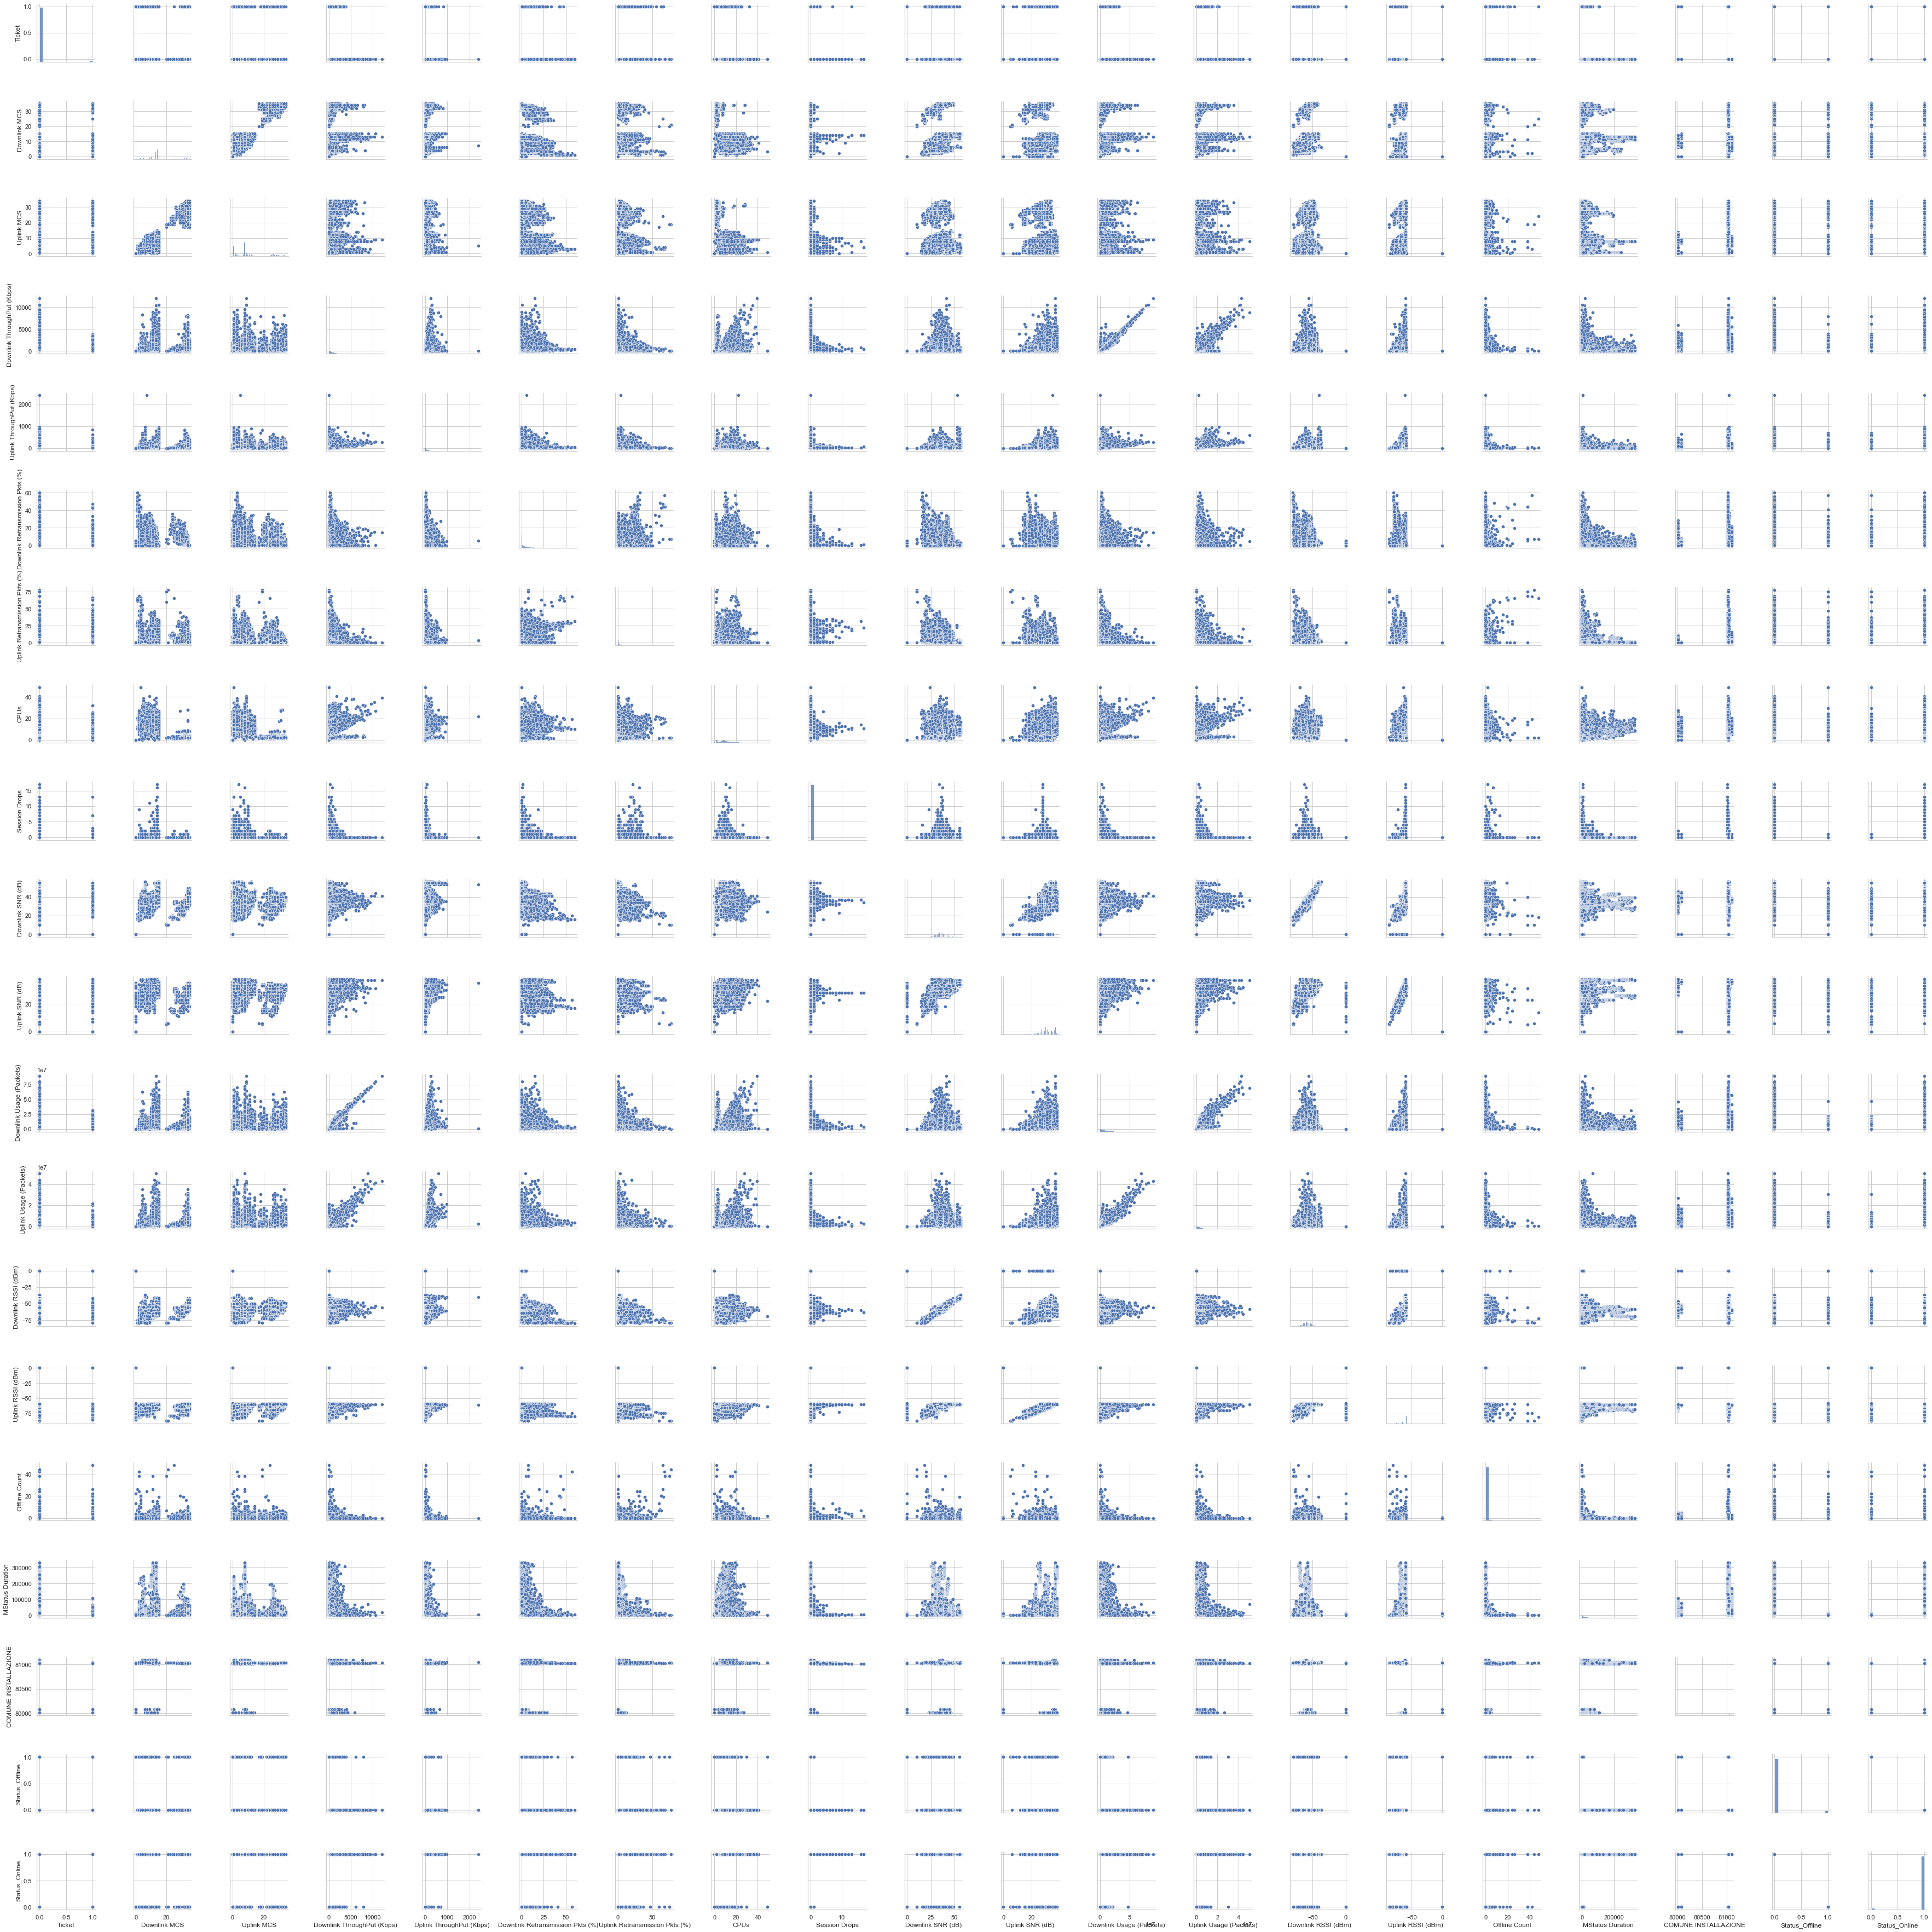

In [10]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#sns.pairplot(XY_data_ctc[colX], height=2.5)
sns.pairplot(XY_data_ctc, height=2.5)
plt.show()

# Matrice di Correlazione

In [8]:
XY_data_ctc.corr(method='pearson')

,Ticket,Downlink MCS,Uplink MCS,Downlink ThroughPut (Kbps),Uplink ThroughPut (Kbps),Downlink Retransmission Pkts (%),Uplink Retransmission Pkts (%),CPUs,Session Drops,Downlink SNR (dB),Uplink SNR (dB),Downlink Usage (Packets),Uplink Usage (Packets),Downlink RSSI (dBm),Uplink RSSI (dBm),Offline Count,MStatus Duration,COMUNE INSTALLAZIONE,Status_Offline,Status_Online
Ticket,1.000000,-0.007294,0.002763,-0.016281,-0.008494,0.003919,0.046754,-0.012043,0.015636,-0.056991,-0.057554,-0.023482,-0.017724,0.061395,0.043388,0.096238,-0.044660,-0.054770,0.092073,-0.092073
Downlink MCS,-0.007294,1.000000,0.916088,0.049277,0.075411,-0.316931,0.050366,-0.620074,-0.030134,0.115148,-0.084516,0.052796,0.009959,0.073804,-0.121022,0.058747,-0.072859,0.121953,-0.110899,0.110899
Uplink MCS,0.002763,0.916088,1.000000,0.026793,0.076978,-0.191109,0.101074,-0.565648,-0.051010,0.005352,-0.120936,0.043875,0.006941,0.071256,-0.106936,0.046044,-0.059096,0.080921,-0.075184,0.075184
Downlink ThroughPut (Kbps),-0.016281,0.049277,0.026793,1.000000,0.465486,0.106379,-0.017159,0.270920,-0.006075,0.133969,0.120420,0.968229,0.886880,-0.035727,-0.040368,0.006615,-0.064861,0.062414,-0.077810,0.077810
Uplink ThroughPut (Kbps),-0.008494,0.075411,0.076978,0.465486,1.000000,0.106871,0.087933,0.170751,-0.007572,0.096296,0.091779,0.545846,0.689436,-0.025019,-0.038357,0.010063,-0.045671,0.007549,-0.062103,0.062103
Downlink Retransmission Pkts (%),0.003919,-0.316931,-0.191109,0.106379,0.106871,1.000000,0.200634,0.367284,-0.017444,-0.216064,-0.094254,0.134469,0.158075,-0.308241,-0.227699,0.018643,0.003603,-0.014761,-0.091090,0.091090
Uplink Retransmission Pkts (%),0.046754,0.050366,0.101074,-0.017159,0.087933,0.200634,1.000000,0.037053,0.119553,-0.170582,-0.223876,-0.008071,0.075291,-0.168095,-0.183958,0.195705,-0.018315,0.104993,0.024705,-0.024705
CPUs,-0.012043,-0.620074,-0.565648,0.270920,0.170751,0.367284,0.037053,1.000000,0.005836,0.097089,0.280684,0.276651,0.316600,-0.312158,-0.163750,-0.025388,0.041198,-0.078942,-0.145379,0.145379
Session Drops,0.015636,-0.030134,-0.051010,-0.006075,-0.007572,-0.017444,0.119553,0.005836,1.000000,0.007003,-0.024034,-0.010195,-0.002495,-0.022973,-0.000230,0.082339,-0.021800,0.013651,-0.018615,0.018615
Downlink SNR (dB),-0.056991,0.115148,0.005352,0.133969,0.096296,-0.216064,-0.170582,0.097089,0.007003,1.000000,0.682978,0.127573,0.109030,0.067138,-0.125997,-0.007620,-0.020994,0.015350,-0.391814,0.391814


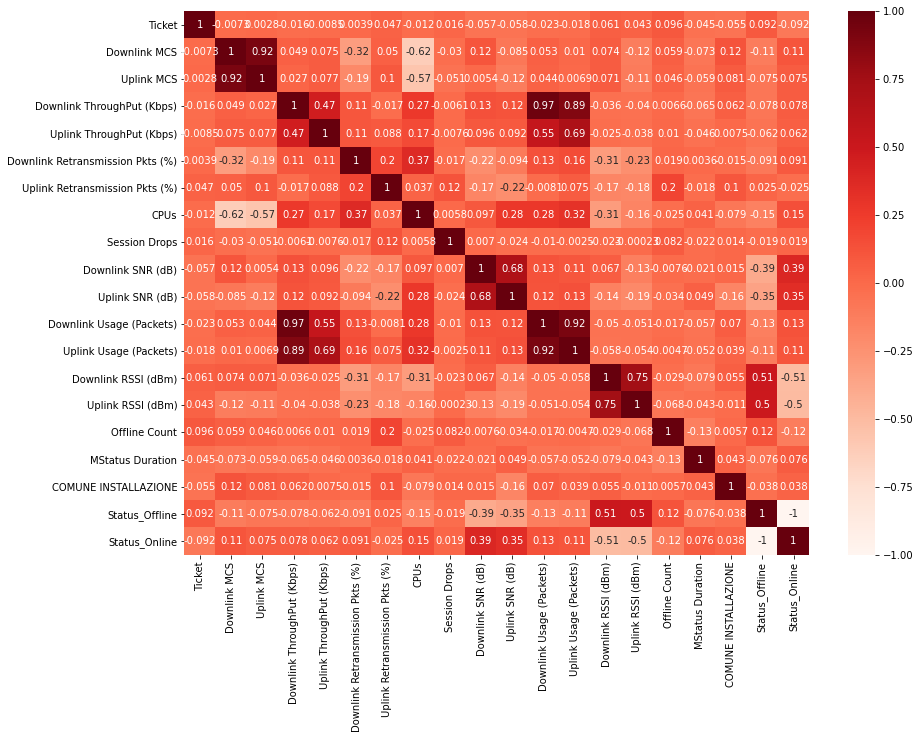

In [9]:
import seaborn as sns  
cor = XY_data_ctc.corr(method='pearson')
plt.figure(figsize = (14,10))
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)

plt.show ()

In [10]:
#Correlazione con la variabile di output 
cor = XY_data_ctc.corr(method='pearson')
cor_target = abs(cor["Ticket"])

#Selecting caratteristiche correlati 
relevant_features = cor_target[cor_target>0.01]
print(relevant_features)


Ticket                            1.000000
Downlink ThroughPut (Kbps)        0.016281
Uplink Retransmission Pkts (%)    0.046754
CPUs                              0.012043
Session Drops                     0.015636
Downlink SNR (dB)                 0.056991
Uplink SNR (dB)                   0.057554
Downlink Usage (Packets)          0.023482
Uplink Usage (Packets)            0.017724
Downlink RSSI (dBm)               0.061395
Uplink RSSI (dBm)                 0.043388
Offline Count                     0.096238
MStatus Duration                  0.044660
COMUNE INSTALLAZIONE              0.054770
Status_Offline                    0.092073
Status_Online                     0.092073
Name: Ticket, dtype: float64


In [11]:
cor = XY_data_ctc.corr(method='pearson')
cor_target = cor["Ticket"]
relevant_features = cor_target[cor_target<-0.1]
print(relevant_features)

Series([], Name: Ticket, dtype: float64)


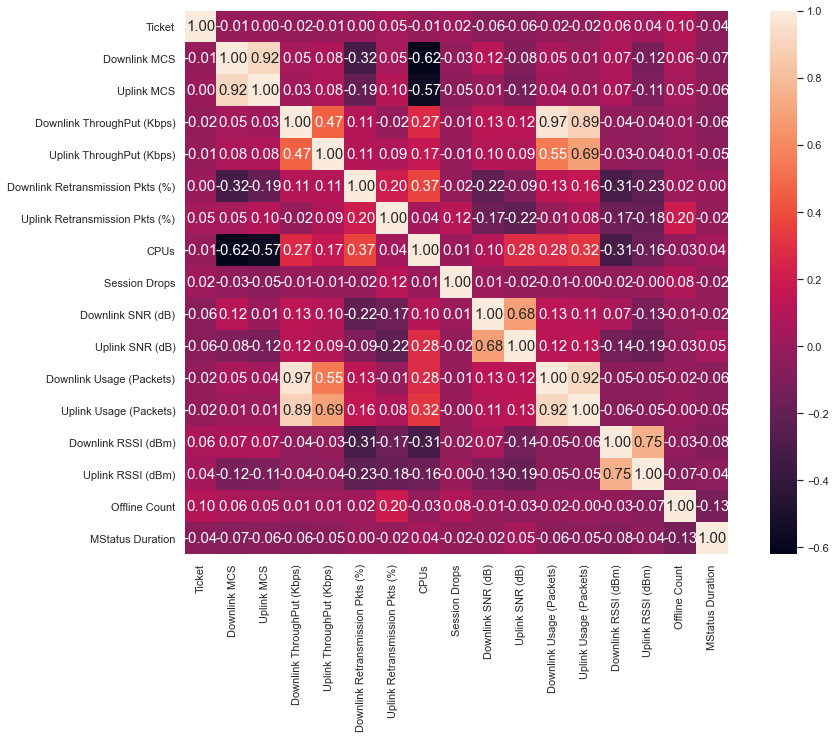

In [16]:
import numpy as np
cols = ['Ticket', 'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'MStatus Duration']
plt.figure(figsize = (15,10))
cm = np.corrcoef(XY_data_ctc[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [17]:
# Verifica Correlazione tra le variabili

print (XY_data_ctc [['Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
       'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)']].corr(method='pearson')) 

                            Downlink MCS  Uplink MCS  \
Downlink MCS                    1.000000    0.916088   
Uplink MCS                      0.916088    1.000000   
Downlink ThroughPut (Kbps)      0.049277    0.026793   
Uplink ThroughPut (Kbps)        0.075411    0.076978   
Downlink SNR (dB)               0.115148    0.005352   
Uplink SNR (dB)                -0.084516   -0.120936   
Downlink Usage (Packets)        0.052796    0.043875   
Uplink Usage (Packets)          0.009959    0.006941   
Downlink RSSI (dBm)             0.073804    0.071256   
Uplink RSSI (dBm)              -0.121022   -0.106936   

                            Downlink ThroughPut (Kbps)  \
Downlink MCS                                  0.049277   
Uplink MCS                                    0.026793   
Downlink ThroughPut (Kbps)                    1.000000   
Uplink ThroughPut (Kbps)                      0.465486   
Downlink SNR (dB)                             0.133969   
Uplink SNR (dB)                    

In [ ]:
# da eliminare Uplink MCS,'Downlink Usage (Packets)','Uplink Usage (Packets)'

colX = ['Ticket', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'COMUNE INSTALLAZIONE':'str' }
XY_data_ctc_filter = pd.DataFrame(XY_data_ctc,columns=colX dtype=dtypes) 


print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

# Dataset di addestramento e dataset di test

In [41]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print("Dataset di trainig: ",X_train.shape)
print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)


Ticket                                     int64
Downlink MCS                               int64
Uplink MCS                                 int64
Downlink ThroughPut (Kbps)               float64
Uplink ThroughPut (Kbps)                 float64
                                          ...   
DIFFUSIONE_TEVECASA CAMBIUM                uint8
DIFFUSIONE_VALLE DI MADDALONI CAMBIUM      uint8
DIFFUSIONE_ZONAIND_NORD                    uint8
DIFFUSIONE_ZONAIND_SUD                     uint8
DIFFUSIONE_ZONAIND_SUD2                    uint8
Length: 1203, dtype: object
Dataset di trainig:  (21641, 1202)
Dataset etichette:  (21641,)
Dataset di test:  (9275, 1202)
Dataset di test per le etichette:  (9275,)


# Riduzione in scala e standardizzazione

In [42]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_std = stdsc.transform(X)

print("Dataset di training standardizzato: ",X_train_std)
print("Dataset di test standardizzato: ",X_test_std)

Dataset di training standardizzato:  [[-0.53290291 -0.27910393  0.70073553 ... -0.13511568  6.00470706
  -0.15890591]
 [-0.32625783 -0.17636387 -0.43024529 ... -0.13511568 -0.16653602
  -0.15890591]
 [-0.22293529 -0.27910393  0.70458568 ... -0.13511568 -0.16653602
  -0.15890591]
 ...
 [-0.22293529 -0.17636387  8.77751991 ... -0.13511568 -0.16653602
  -0.15890591]
 [ 1.8435155   1.67295721  0.30197026 ... -0.13511568 -0.16653602
  -0.15890591]
 [-0.22293529 -0.27910393 -0.30882814 ... -0.13511568 -0.16653602
  -0.15890591]]
Dataset di test standardizzato:  [[ 1.43022534  1.57021715 -0.99099177 ... -0.13511568 -0.16653602
  -0.15890591]
 [-0.22293529 -0.99828435  0.66690924 ... -0.13511568 -0.16653602
  -0.15890591]
 [-1.04951561 -0.48458405 -0.82557293 ... -0.13511568 -0.16653602
  -0.15890591]
 ...
 [ 1.22358026  1.67295721 -0.92732683 ... -0.13511568 -0.16653602
  -0.15890591]
 [-0.32625783 -0.27910393  0.11551312 ... -0.13511568 -0.16653602
  -0.15890591]
 [-0.32625783  0.02911625 -0

# Selezione delle caratteristiche appropriate:

In [43]:
# Regolarizzazione

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, max_iter=500)

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9834573263712397
Test accuracy: 0.9802695417789757


In [44]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[0.9229383 0.0770617]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.22938302e-01 7.70616984e-02]
 [9.99962038e-01 3.79615912e-05]
 [9.99985151e-01 1.48488058e-05]
 ...
 [9.99891157e-01 1.08843332e-04]
 [9.99980769e-01 1.92312562e-05]
 [8.97217154e-01 1.02782846e-01]]


In [45]:
# Verifica predizione in dataset di test
y_pred = lr.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])

y_proba_pred_1 = lr.predict_proba(X_test_std[27:28,:])
print(y_proba_pred_1)
y_proba_pred_2 = lr.predict_proba(X_test_std[1793:1795,:])
print(y_proba_pred_2)

Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 9275
Totali elementi y Pred: 9275
Quanti y = 1,y=0 in Test: 185 9090
Quanti y = 1,y=0 in Pred: 16 9259
Indice degli errori (array([  27,   99,  116,  118,  202,  211,  314,  332,  378,  450,  461,
        481,  552,  556,  657,  663,  857,  911,  917,  993, 1021, 1022,
       1036, 1097, 1107, 1156, 1173, 1282, 1301, 1372, 1379, 1394, 1505,
       1586, 1670, 1720, 1763, 1783, 1793, 1882, 1897, 1901, 1905, 1906,
       1910, 1930, 2077, 2169, 2184, 2240, 2288, 2348, 2384, 2396, 2400,
       2424, 2503, 2572, 2575, 2696, 2710, 2775, 2778, 2801, 2808, 2824,
       3009, 3078, 3157, 3385, 3411, 3455, 3546, 3572, 3592, 3603, 3608,
       3663, 3682, 3700, 3805, 3810, 3969, 3987, 3994, 4022, 4139, 4253,
       4333, 4527, 4597, 4602, 4621, 4628, 4646, 4652, 4695, 4741, 4748,
       4822, 4961, 5102, 5123, 5175, 5181, 5224, 5283, 5355, 5411, 5533,
       5581, 5663, 5691, 5703, 5813, 5877, 5879, 5902

In [46]:
for i in range(0,len(X_test_std)):
    z = np.array([X_test_std[i]])
    y = lr.predict(z) 
    #print((i+1) ,X_test_std[i], y_test[i], y)
    if (y_test[i]!=y):
        print((i+1) ,X_test_std[i], y_test[i], y)

28 [-0.11961275 -0.89554429 -0.61683994 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
100 [-0.42958037 -0.89554429  0.46766411 ... -0.13511568 -0.16653602
  6.29303197] 1 [0]
117 [ 1.8435155   1.67295721 -0.44344579 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
119 [-0.22293529 -0.99828435 -0.04275545 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
203 [-1.35948323 -0.99828435  3.07723907 ... -0.13511568 -0.16653602
  6.29303197] 1 [0]
212 [-0.32625783 -0.99828435  2.46575314 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
315 [ 1.8435155   1.67295721  1.26450713 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
333 [-0.22293529  0.02911625 -0.54877483 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
379 [ 1.8435155   1.67295721 -0.58053855 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
451 [-1.35948323 -0.99828435 -0.01841701 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
462 [-0.42958037 -0.27910393 -0.62495275 ... -0.13511568 -0.16653602
 -0.15890591] 1 [0]
482 [-1.46280576 -0.99

In [12]:
# Regolarizzazione L1

from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

lr1.fit(X_train_std, y_train)
print('Training accuracy:', lr1.score(X_train_std, y_train))
print('Test accuracy:', lr1.score(X_test_std, y_test))

Training accuracy: 0.9833649092001294
Test accuracy: 0.9802695417789757


In [13]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr1.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr1.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[0.92612784 0.07387216]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.26127839e-01 7.38721609e-02]
 [9.99482120e-01 5.17879593e-04]
 [9.99895900e-01 1.04099647e-04]
 ...
 [9.98616844e-01 1.38315588e-03]
 [9.99841454e-01 1.58546236e-04]
 [8.96115620e-01 1.03884380e-01]]


In [31]:
# Verifica predizione in dataset di test
y_pred = lr1.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])


Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 9275
Totali elementi y Pred: 9275
Quanti y = 1,y=0 in Test: 185 9090
Quanti y = 1,y=0 in Pred: 16 9259
Indice degli errori (array([  27,   99,  116,  118,  202,  211,  314,  332,  378,  450,  461,
        481,  552,  556,  657,  663,  857,  911,  917,  993, 1021, 1022,
       1036, 1097, 1107, 1156, 1173, 1282, 1301, 1372, 1379, 1394, 1505,
       1586, 1670, 1720, 1763, 1783, 1793, 1882, 1897, 1901, 1905, 1906,
       1910, 1930, 2077, 2169, 2184, 2240, 2288, 2348, 2384, 2396, 2400,
       2424, 2503, 2572, 2575, 2696, 2710, 2775, 2778, 2801, 2808, 2824,
       3009, 3078, 3157, 3385, 3411, 3455, 3546, 3572, 3592, 3603, 3608,
       3663, 3682, 3700, 3805, 3810, 3969, 3987, 3994, 4022, 4139, 4253,
       4333, 4527, 4597, 4602, 4621, 4628, 4646, 4652, 4695, 4741, 4748,
       4822, 4961, 5102, 5123, 5175, 5181, 5224, 5283, 5355, 5411, 5533,
       5581, 5663, 5691, 5703, 5813, 5877, 5879, 5902

In [15]:
# Regolarizzazione L2

from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
lr2.fit(X_train_std, y_train)
print('Training accuracy:', lr2.score(X_train_std, y_train))
print('Test accuracy:', lr2.score(X_test_std, y_test))

Training accuracy: 0.9834111177856846
Test accuracy: 0.9802695417789757


In [27]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr2.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr2.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[0.92145371 0.07854629]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.21453713e-01 7.85462871e-02]
 [9.99998698e-01 1.30234352e-06]
 [9.99999194e-01 8.06107068e-07]
 ...
 [9.99998312e-01 1.68777576e-06]
 [9.99998869e-01 1.13136972e-06]
 [8.99273696e-01 1.00726304e-01]]


In [28]:
# Verifica predizione in dataset di test
y_pred = lr2.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])


Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 9275
Totali elementi y Pred: 9275
Quanti y = 1,y=0 in Test: 185 9090
Quanti y = 1,y=0 in Pred: 15 9260
Indice degli errori (array([  27,   99,  116,  118,  202,  211,  314,  332,  378,  450,  461,
        481,  552,  556,  657,  663,  857,  911,  917,  993, 1021, 1022,
       1036, 1097, 1107, 1156, 1173, 1282, 1301, 1372, 1379, 1394, 1505,
       1586, 1670, 1720, 1763, 1783, 1793, 1882, 1897, 1901, 1905, 1906,
       1910, 1930, 2077, 2169, 2184, 2240, 2288, 2348, 2384, 2396, 2400,
       2424, 2459, 2503, 2572, 2575, 2696, 2710, 2775, 2778, 2801, 2808,
       2824, 3009, 3078, 3157, 3385, 3411, 3455, 3546, 3572, 3592, 3603,
       3608, 3663, 3682, 3700, 3805, 3810, 3969, 3987, 3994, 4022, 4139,
       4253, 4333, 4527, 4597, 4602, 4621, 4628, 4646, 4652, 4695, 4741,
       4748, 4822, 4961, 5102, 5123, 5175, 5181, 5224, 5283, 5355, 5411,
       5533, 5581, 5663, 5691, 5703, 5813, 5877, 5879

# Selezione delle caratteristiche

# Apprendimento
## Selezione modello predittivo
## scelta metrica prestazionale
## regolarizzazione

# Valutazione modello finale

# Predizione